<a href="https://colab.research.google.com/github/Saifullah785/Machine_Learning_Projects/blob/main/Project_12_Job_Placement_Prediction_ML_model/Project_12_Job_Placement_Prediction_ML_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# Import the necessary libraries
import numpy as np
import pandas as pd

In [30]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv('/content/Job_Placement_Data.csv')
# Display the first 5 rows of the DataFrame
df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


#**Preprocessing**

In [31]:
# Display the shape of the DataFrame (number of rows and columns)
df.shape

(215, 13)

In [32]:
# Check for missing values in each column
df.isnull().sum()

,0
gender,0
ssc_percentage,0
ssc_board,0
hsc_percentage,0
hsc_board,0
hsc_subject,0
degree_percentage,0
undergrad_degree,0
work_experience,0
emp_test_percentage,0


In [33]:
# Check for duplicate rows in the DataFrame
df.duplicated().sum()

np.int64(0)

In [34]:
# Display information about the DataFrame, including data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [35]:
# Display the 'status' column
df['status']

,status
0,Placed
1,Placed
2,Placed
3,Not Placed
4,Placed
...,...
210,Placed
211,Placed
212,Placed
213,Placed


In [36]:
# Display descriptive statistics for the numerical columns
df.describe()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


#**EDA (Exploratory Data Analysis)**

In [37]:
# Calculate the correlation matrix for numerical columns
corr = df.select_dtypes(include=np.number).corr()
# Display the correlation matrix
corr

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
ssc_percentage,1.000000,0.511472,0.538404,0.261993,0.388478
hsc_percentage,0.511472,1.000000,0.434206,0.245113,0.354823
degree_percentage,0.538404,0.434206,1.000000,0.224470,0.402364
emp_test_percentage,0.261993,0.245113,0.224470,1.000000,0.218055
mba_percent,0.388478,0.354823,0.402364,0.218055,1.000000


<Axes: >

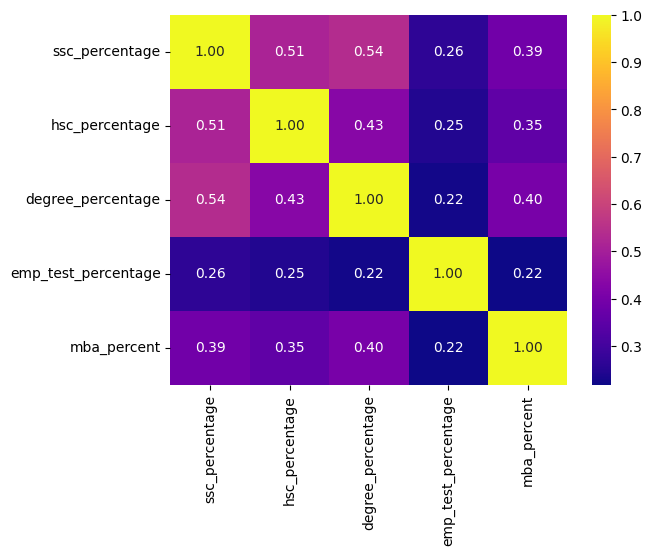

In [38]:
# Import seaborn for visualization
import seaborn as sns
# Create a heatmap of the correlation matrix
sns.heatmap(corr, cmap='plasma', annot=True, fmt='.2f')

#**Plot a histogram of the ssc_percentage columns**

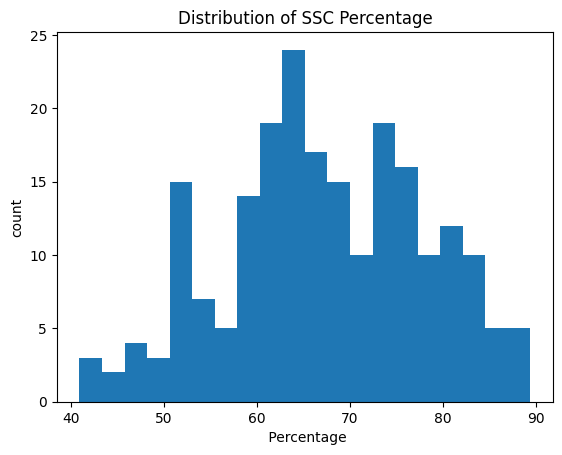

In [39]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt
# Plot a histogram of the 'ssc_percentage' column
plt.hist(df['ssc_percentage'],bins= 20)
plt.title('Distribution of SSC Percentage')
plt.xlabel(' Percentage')
plt.ylabel('count')
plt.show()

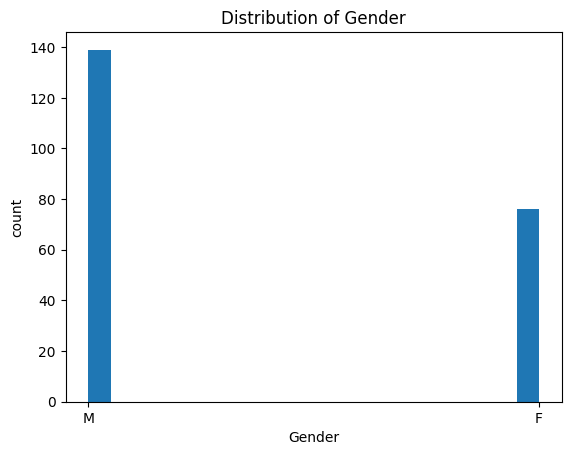

In [40]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt
# Plot a histogram of the 'gender' column
plt.hist(df['gender'], bins = 20)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('count')
plt.show()

#**Plot a scatterplot of ssc_percentage vs.hsc_percentage**

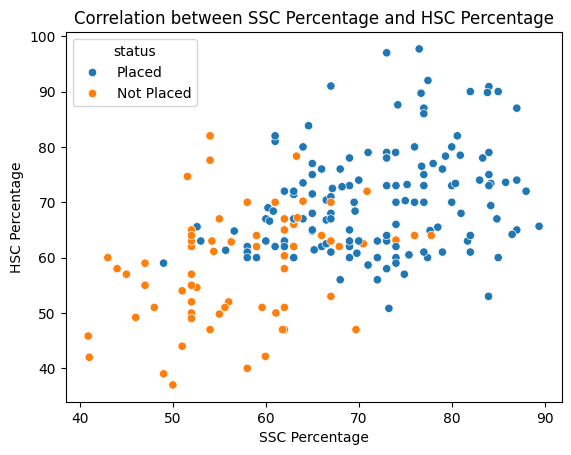

In [41]:
# Create a scatterplot of 'ssc_percentage' vs. 'hsc_percentage', colored by 'status'
sns.scatterplot(x='ssc_percentage', y='hsc_percentage', data=df, hue='status')
plt.title('Correlation between SSC Percentage and HSC Percentage')
plt.xlabel('SSC Percentage')
plt.ylabel('HSC Percentage')
plt.show()

#**Plot a scatterplot of ssc_percentage vs hsc_percentage**

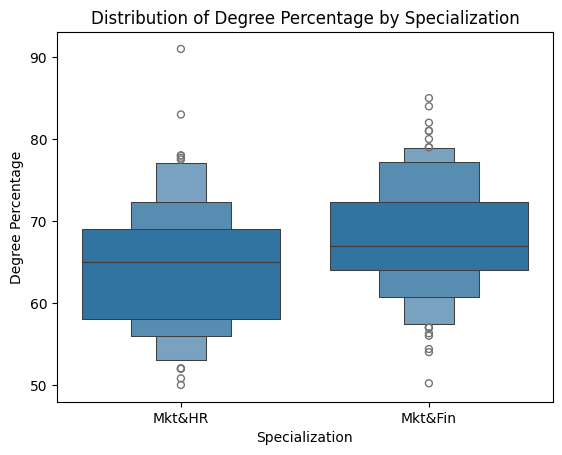

In [42]:
# Create a boxenplot of 'degree_percentage' by 'specialisation'
sns.boxenplot(x='specialisation', y='degree_percentage', data=df)
plt.title('Distribution of Degree Percentage by Specialization')
plt.xlabel('Specialization')
plt.ylabel('Degree Percentage')
plt.show()

#**Categorical features into binary/dummy variables**

In [43]:
# Convert categorical features into dummy variables and drop the first category to avoid multicollinearity
df = pd.get_dummies(df, columns=['gender', 'ssc_board', 'hsc_board', 'hsc_subject', 'undergrad_degree', 'work_experience', 'specialisation', 'status'],drop_first=True)

In [44]:
# Display the DataFrame after one-hot encoding
df

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent,gender_M,ssc_board_Others,hsc_board_Others,hsc_subject_Commerce,hsc_subject_Science,undergrad_degree_Others,undergrad_degree_Sci&Tech,work_experience_Yes,specialisation_Mkt&HR,status_Placed
0,67.00,91.00,58.00,55.0,58.80,True,True,True,True,False,False,True,False,True,True
1,79.33,78.33,77.48,86.5,66.28,True,False,True,False,True,False,True,True,False,True
2,65.00,68.00,64.00,75.0,57.80,True,False,False,False,False,False,False,False,False,True
3,56.00,52.00,52.00,66.0,59.43,True,False,False,False,True,False,True,False,True,False
4,85.80,73.60,73.30,96.8,55.50,True,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,True,True,True,True,False,False,False,False,False,True
211,58.00,60.00,72.00,74.0,53.62,True,True,True,False,True,False,True,False,False,True
212,67.00,67.00,73.00,59.0,69.72,True,True,True,True,False,False,False,True,False,True
213,74.00,66.00,58.00,70.0,60.23,False,True,True,True,False,False,False,False,True,True


#**Train Test Split**

In [45]:
# Separate features (x) and target variable (y)
x = df.drop('status_Placed', axis=1)
y = df['status_Placed']

In [46]:
# Print the shapes of the feature and target variables
print(x.shape, '\n\n', y.shape)

(215, 14) 

 (215,)


In [47]:
# Import train_test_split for splitting data
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [48]:
# Print the shapes of the training and testing feature sets
print(x_train.shape, '\n\n', x_test.shape)

(172, 14) 

 (43, 14)


#**Train Logistic Model**


In [49]:
# Import LogisticRegression model
from sklearn.linear_model import LogisticRegression
# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [50]:
# Make predictions on the test set
y_pred = model.predict(x_test)

#**Comparison Between Output**

In [51]:
# Import accuracy_score for evaluating the model
from sklearn.metrics import accuracy_score
# Calculate and print the accuracy of the model
print(accuracy_score(y_test, y_pred))

0.813953488372093


In [52]:
# Display a random sample of 5 rows from the DataFrame
df.sample(5)

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent,gender_M,ssc_board_Others,hsc_board_Others,hsc_subject_Commerce,hsc_subject_Science,undergrad_degree_Others,undergrad_degree_Sci&Tech,work_experience_Yes,specialisation_Mkt&HR,status_Placed
80,69.0,62.0,69.00,67.00,62.35,False,True,True,True,False,False,False,True,True,True
22,69.8,60.8,72.23,55.53,68.81,False,True,True,False,True,False,True,False,True,True
146,62.0,63.0,66.00,85.00,55.14,True,False,True,False,True,False,False,False,True,True
55,60.4,66.6,65.00,71.00,52.71,True,False,True,False,True,False,False,False,True,True
196,72.0,63.0,77.50,78.00,54.48,True,True,True,False,True,False,True,True,False,True


# **Prediction System**

In [53]:
# Define input data for prediction
input_data = (67.0,70.0,65.0,88.00,71.96,0,0,0,1,0,1,0,0,1)

# Convert input data to a numpy array
np_df = np.asarray(input_data)

# Reshape the numpy array for prediction
reshaped_df = np_df.reshape(1,-1)

# Make a prediction using the trained model
prediction = model.predict(reshaped_df)
# Print the prediction result
if prediction[0] == 1:
    print("this person is placed for the job")
else:
    print("this person is not placed for the job")

this person is not placed for the job


In [54]:
# Import pickle library
# import pickle
# # Save the trained model to a pickle file (commented out)
# pickle.dump(model,open('placement.pkl','wb'))